In [2]:
# importing libraries
import numpy as np
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('full_8classes_f_stemmer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 3].values

In [4]:
len(X)

354382

In [5]:
import matplotlib.pyplot as plt

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

In [6]:
# fix empty values
for i in range(len(X[:, 0])):
    if type(X[i, 0]) is not str:
        X[i, 0] = ''
for i in range(len(X[:, 1])):
    if type(X[i, 1]) is not str:
        X[i, 1] = ''

In [7]:
# Stratified 10-fold cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

accuracies = []
precisions = [[], [], [], [], [], [], [], []]

In [8]:
# split strafified kfold
skf = StratifiedKFold(n_splits=10, shuffle=True)
splits = skf.split(X, y)

In [9]:
# import oversamplig
from imblearn.over_sampling import RandomOverSampler

In [ ]:
for train_index, test_index in splits:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('X_train size: ' + str(len(X_train)))
    print('X_test size: ' + str(len(X_test)))
    
    # Vectorize titles and summary separately
    
    title_cv = CountVectorizer(max_features = None, ngram_range=(1,1))
    X_title = title_cv.fit_transform(X_train[:, 0])
    summary_cv = CountVectorizer(max_features = None, ngram_range=(1,1))
    X_summary = summary_cv.fit_transform(X_train[:, 1])
    
    # Apply SVD transformation n_components=20 and 100 separately
    svd_title = TruncatedSVD(n_components=200)
    X_title = svd_title.fit_transform(X_title)
    svd_summary = TruncatedSVD(n_components=800)
    X_summary = svd_summary.fit_transform(X_summary)
    
    # Concatenate title and summary svd representation
    X_train = np.concatenate((X_title, X_summary), axis=1)
    
    # resampling
    ros = RandomOverSampler(random_state=None)
    X_train, y_train = ros.fit_sample(X_train, y_train)
    print('Resampled X_train size: '+str(len(X_train)))

    
    # train the model
    classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', n_jobs=-1, verbose=2)
    classifier.fit(X_train, y_train)
    
    # Vectorize titles and summary separately
    X_title = title_cv.transform(X_test[:, 0])
    X_summary = summary_cv.transform(X_test[:, 1])
    
    # Apply SVD transformation n_components=20 and 100 separately
    X_title = svd_title.transform(X_title)
    X_summary = svd_summary.transform(X_summary)
    
    # Concatenate title and summary svd representation
    X_test = np.concatenate((X_title, X_summary), axis=1)
    
    # predict test set
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = ['A','B','C','D','E','F','G','H']
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, title='Matriz de Confusao')
    plt.show()
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print('Acuracia: ' + str(acc))
    
    ps = [[], [], [], [], [], [], [], []]
    for i in range(8):
        #ps[i] = accuracy_score(y_test[:,i], y_pred[:,i])
        ps[i] = cm[i, i] / np.array(cm[i, :]).sum()
        precisions.append(ps[i])
        print('Acuracia '+chr(i + 65)+': ' + str(ps[i]))
        
    print('\n')
    break

X_train size: 318942
X_test size: 35440
Resampled X_train size: 620984
building tree 1 of 500
building tree 3 of 500building tree 2 of 500building tree 4 of 500building tree 5 of 500building tree 6 of 500




building tree 8 of 500building tree 7 of 500building tree 9 of 500building tree 10 of 500building tree 11 of 500building tree 12 of 500building tree 13 of 500building tree 14 of 500building tree 15 of 500








building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min


building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 25.0min


building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500


[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed: 59.4min


building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500


In [11]:
classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [14]:
   
# predict test set
y_pred = classifier.predict(X_test)

[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:    1.8s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    2.5s finished


In [15]:
len(y_pred)

35440

Confusion matrix, without normalization
[[5485 1240 1395   45   71  127  162  100]
 [1631 4613  785   28   59  296  163  118]
 [ 626  350 5574   28    9   48   26   17]
 [ 124  146  168  315    4    9    6    7]
 [ 582  562   93    4  454   82   38   35]
 [ 608  938  116    9   24 1436   41   73]
 [ 738  641  224   11   22   82 1251  352]
 [ 394  389  120    0    8  115  308 1915]]


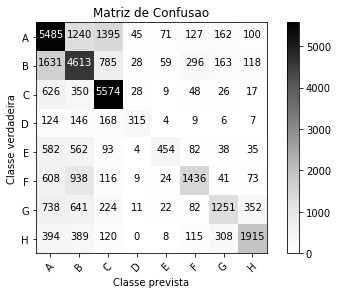

Acuracia: 0.593764108352
Acuracia A: 0.635942028986
Acuracia B: 0.599636032757
Acuracia C: 0.834681042228
Acuracia D: 0.404364569961
Acuracia E: 0.245405405405
Acuracia F: 0.442526964561
Acuracia G: 0.376693766938
Acuracia H: 0.589412126808


In [21]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Matriz de Confusao')
plt.show()
    
acc = accuracy_score(y_test, y_pred)
accuracies.append(acc)
print('Acuracia: ' + str(acc))
    
ps = [[], [], [], [], [], [], [], []]
for i in range(8):
    #ps[i] = accuracy_score(y_test[:,i], y_pred[:,i])
    ps[i] = cm[i, i]*1.0 / np.array(cm[i, :]).sum()
    print('Acuracia '+chr(i + 65)+': ' + str(ps[i]))